## Linear Regression

$$
\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}
$$

* $\hat{y}$ is the predicted value;
* $n$ is the number of caracteristics;
* $x_{i}$ is the caracteristics value;
* $\theta_{j}$ are the parameters.

Vector form:
$$
\hat{y} = h_{\theta}(x) = \theta . x
$$

* $\theta$ is the parameters vector;
* $x$ is the caracteristics vector;
* $\theta . x$ is the dot product that results in $\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$;
* $h_{\theta}$ is hypotheses function.

#### The Normal Equation

$$
\hat{\theta}=(X^{T}X)^{-1} X^{T} y
$$

* $\hat{\theta}$ is the $\theta$ that minimze the cost function;
* $y$ is the values vector.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

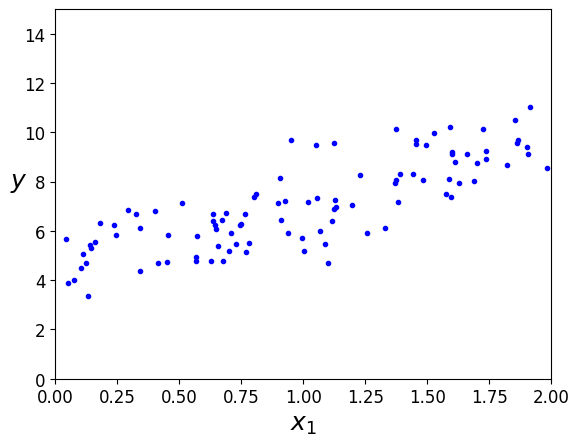

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.46816176],
       [2.61425893]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.46816176],
       [9.69667962]])

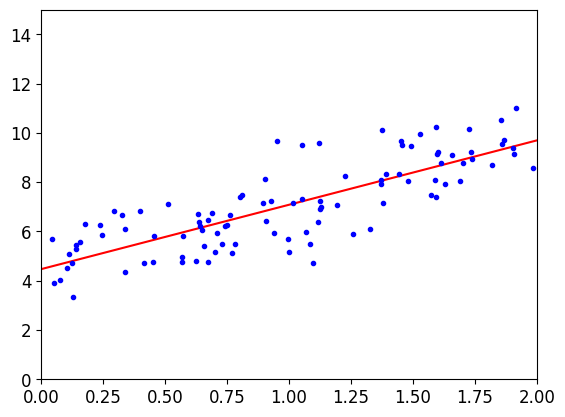

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

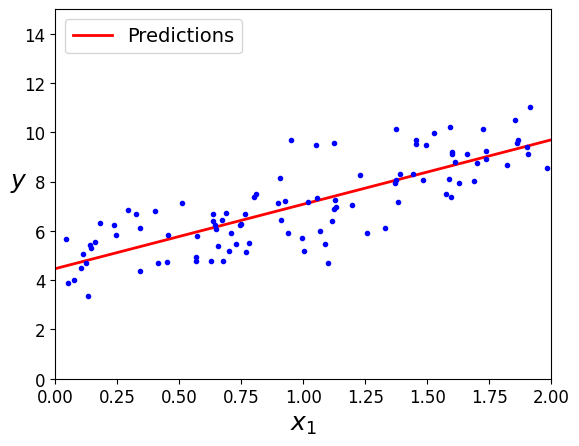

In [8]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.46816176]), array([[2.61425893]]))

In [10]:
lin_reg.predict(X_new)

array([[4.46816176],
       [9.69667962]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.46816176],
       [2.61425893]])

This function computes $X^{+}y$, where $X^{+}$ is the *pseudoinverse* of $X$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.46816176],
       [2.61425893]])

## Gradient Descent

#### Batch Gradient Descent